IMDB EDA Project

In [1]:
#libraries required for this project.
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

1. Project Setup and Loading

In [2]:
#Dataset loading
df = pd.read_csv("imdb_movies.csv")
df 

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [3]:
df.shape #shape of data is 10178 rows * 12 columns

(10178, 12)

2. Data Overview and Basic Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [5]:
df.isnull().sum() #null values in data

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [6]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In Python, the .describe() method is used with pandas DataFrames to generate summary statistics for each numerical column.
Interpretation:

    Mean (Average): The mean represents the central value of the dataset. A mean significantly different from the median may indicate skewness.
    Median (50% or 0.5 quantile): The median is the middle value of the dataset, which is less affected by outliers than the mean.
    Distribution Insights:
        If mean ≈ median, the distribution is approximately symmetric.
        If mean > median, the distribution is right-skewed (positive skew).
        If mean < median, the distribution is left-skewed (negative skew).
    Standard Deviation (std): Measures the spread of the data. A high standard deviation indicates greater variability.
    Minimum & Maximum: Help understand the range of data.
    Quartiles (25%, 75%): Indicate how the data is distributed.

3. Data Cleaning

In [7]:
#null values in columns "genre" and "crew", filling it with "Unavailable"
df["genre"] = df["genre"].fillna("Unavailable")
df["crew"] = df["crew"].fillna("Unavailable")

In [8]:
#Colums date_x DataType is showing as object and needed it to change to datetime format.
df["date_x"] = pd.to_datetime(df["date_x"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10178 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10178 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [9]:
#Extracting year from "year" column to categorise by year.
df["year"] = df["date_x"].dt.strftime("%Y")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995


4. Univariate Analysis

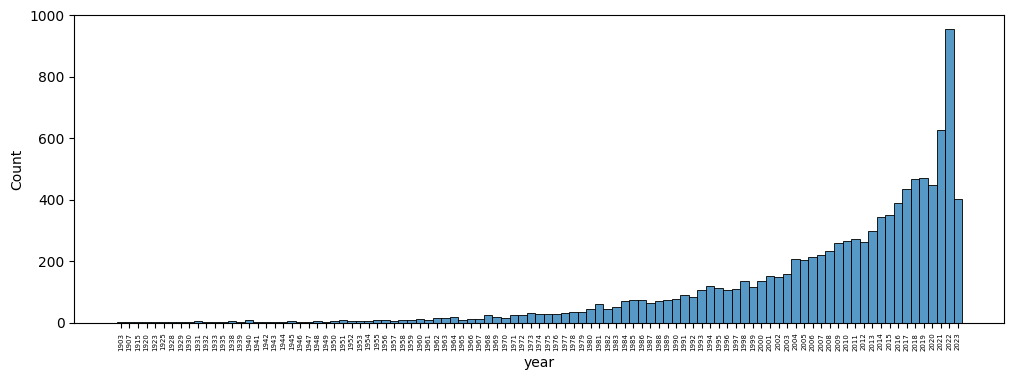

In [10]:
df = df.sort_values(by = "year")
plt.figure(figsize= (12,4))
sns.histplot(df["year"])
plt.xticks(rotation = 90, fontsize = 5)
plt.show()

In [ ]:
#less no of releases in 2020 because of covid

In [11]:
gb = df.groupby("genre").agg({"date_x": "count"})
gb = gb.sort_values(by = "date_x", ascending = False)
gb = gb.head(10)

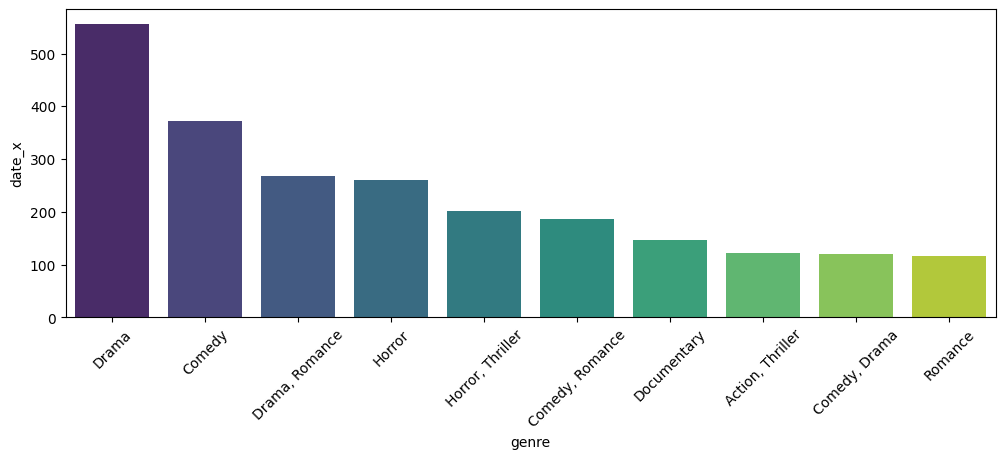

In [12]:
plt.figure(figsize= (12,4))
sns.barplot(x = gb.index, y= gb["date_x"], data=gb, hue= gb.index, palette= "viridis")
plt.xticks(rotation = 45)
plt.show()

Most common genres in dataset are as above.

5. Bivariate Analysis

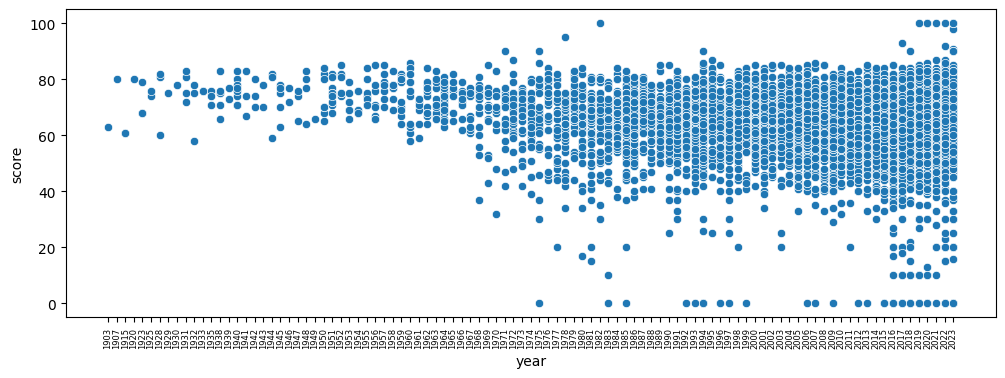

In [13]:
plt.figure(figsize= (12,4))
sns.scatterplot(x= "year", y= "score", data= df)
plt.xticks(rotation = 90, fontsize= 6)
plt.show()

In initial years movies made are less but they are high in quality as rated high but later much more movies are relesed which lead to more diversification in ratings.

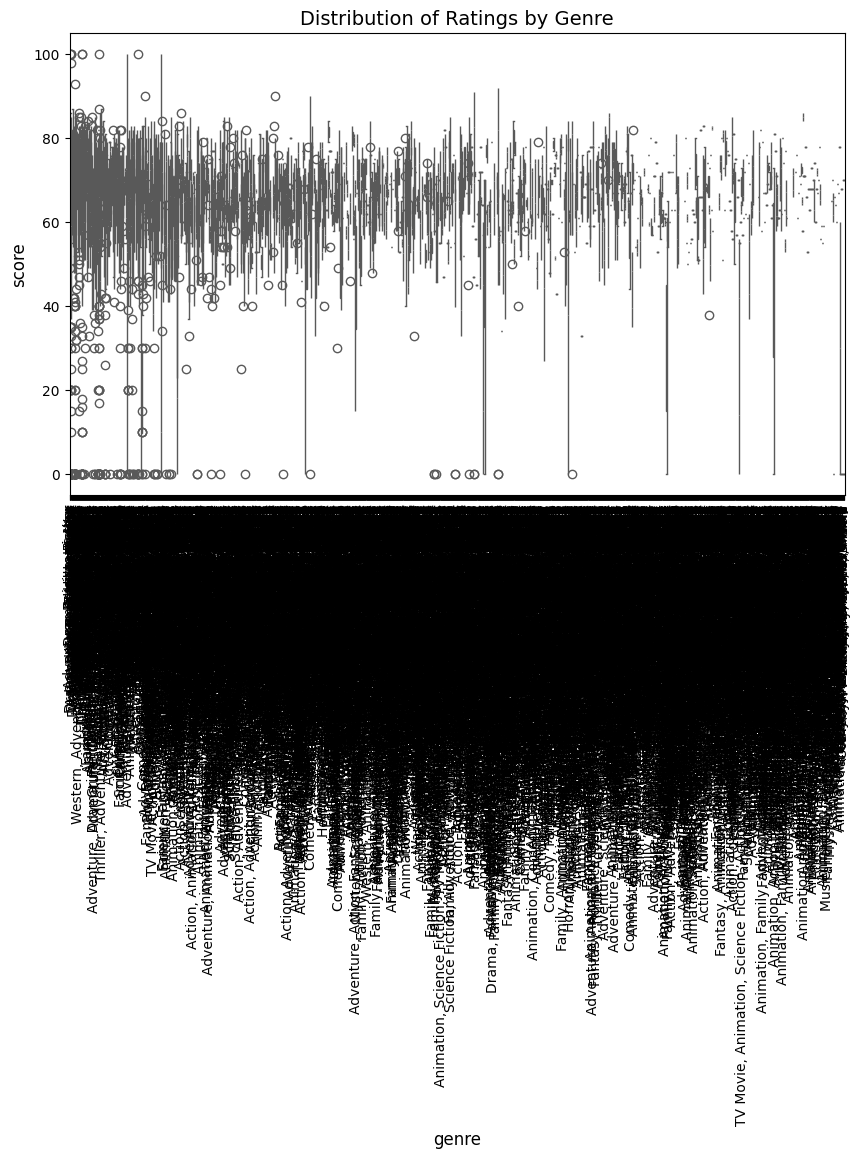

In [21]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(x='genre', y='score', hue='genre', data=df, palette="Set2", legend=False)

# Customize labels and title
plt.xlabel("genre", fontsize=12)
plt.ylabel("score", fontsize=12)
plt.title("Distribution of Ratings by Genre", fontsize=14)
plt.xticks(rotation = 90)

plt.show()


6. Genre Specific Analysis

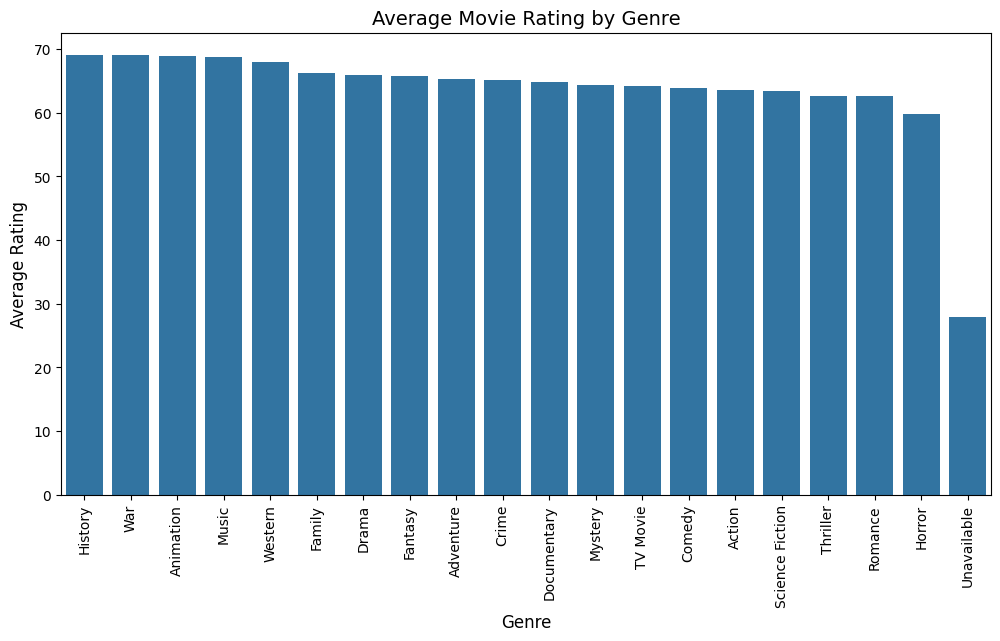

genre
History      69.158768
War          69.070922
Animation    68.994550
Music        68.714801
Western      68.007634
Name: score, dtype: float64

In [26]:
# Split multiple genres into separate rows
df_expanded = df.assign(genre=df['genre'].str.split(',')).explode('genre')

# Trim whitespace in genre names
df_expanded['genre'] = df_expanded['genre'].str.strip()

# Calculate average rating per genre
genre_avg_rating = df_expanded.groupby('genre')['score'].mean().sort_values(ascending=False)

# Plot the average rating per genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, legend= False)
plt.xticks(rotation=90)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Movie Rating by Genre", fontsize=14)
plt.show()

# Display top 5 genres with highest ratings
genre_avg_rating.head(5)


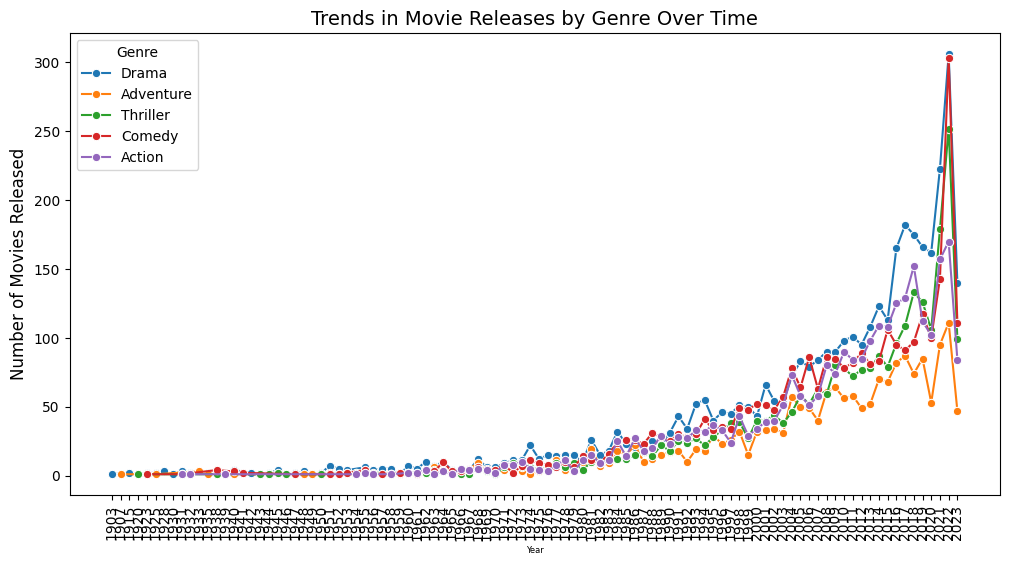

In [32]:
# Count number of movies released per genre each year
genre_trends = df_expanded.groupby(['year', 'genre']).size().reset_index(name='count')

# Plot the trend for the top 5 most frequent genres
top_genres = df_expanded['genre'].value_counts().nlargest(5).index
genre_trends_top = genre_trends[genre_trends['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trends_top, x='year', y='count', hue='genre', marker='o', palette='tab10')
plt.xticks(rotation=90)
plt.xlabel("Year", fontsize=6)
plt.ylabel("Number of Movies Released", fontsize=12)
plt.title("Trends in Movie Releases by Genre Over Time", fontsize=14)
plt.legend(title="Genre")
plt.show()


7. Year and Trend Analysis

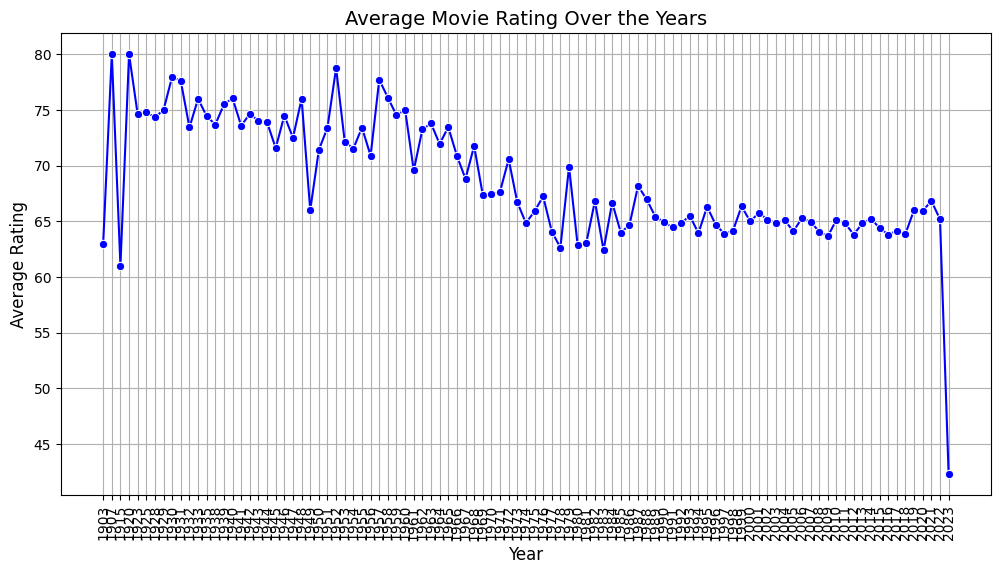

In [34]:
# Calculate the average rating per year
avg_rating_per_year = df_expanded.groupby('year')['score'].mean()

# Plot average rating over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values, marker="o", color="b")
plt.xticks(rotation=90)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Movie Rating Over the Years", fontsize=14)
plt.grid(True)
plt.show()


C:\Users\ajaym\AppData\Local\Temp\ipykernel_14876\3247552402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette="viridis")


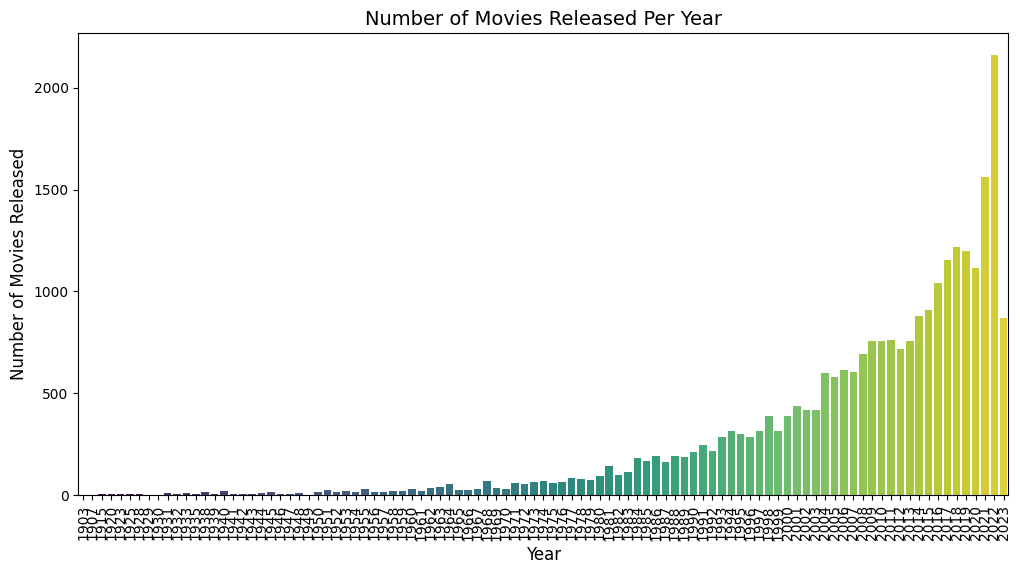

Highest release year: 2022 with 2159 movies
Lowest release year: 1929 with 1 movies


In [35]:
# Count number of movies released per year
movies_per_year = df_expanded['year'].value_counts().sort_index()

# Plot number of movies released each year
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette="viridis")

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies Released", fontsize=12)
plt.title("Number of Movies Released Per Year", fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Find the years with highest and lowest movie releases
highest_release_year = movies_per_year.idxmax()
lowest_release_year = movies_per_year.idxmin()

print(f"Highest release year: {highest_release_year} with {movies_per_year.max()} movies")
print(f"Lowest release year: {lowest_release_year} with {movies_per_year.min()} movies")


8. Multivariate Analysis

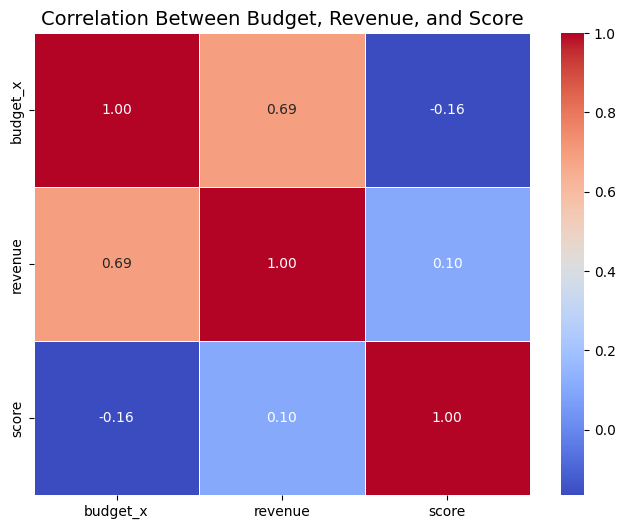

In [40]:
numeric_cols = ['budget_x', 'revenue', 'score']
df_numeric = df_expanded[numeric_cols].dropna()

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Budget, Revenue, and Score", fontsize=14)
plt.show()


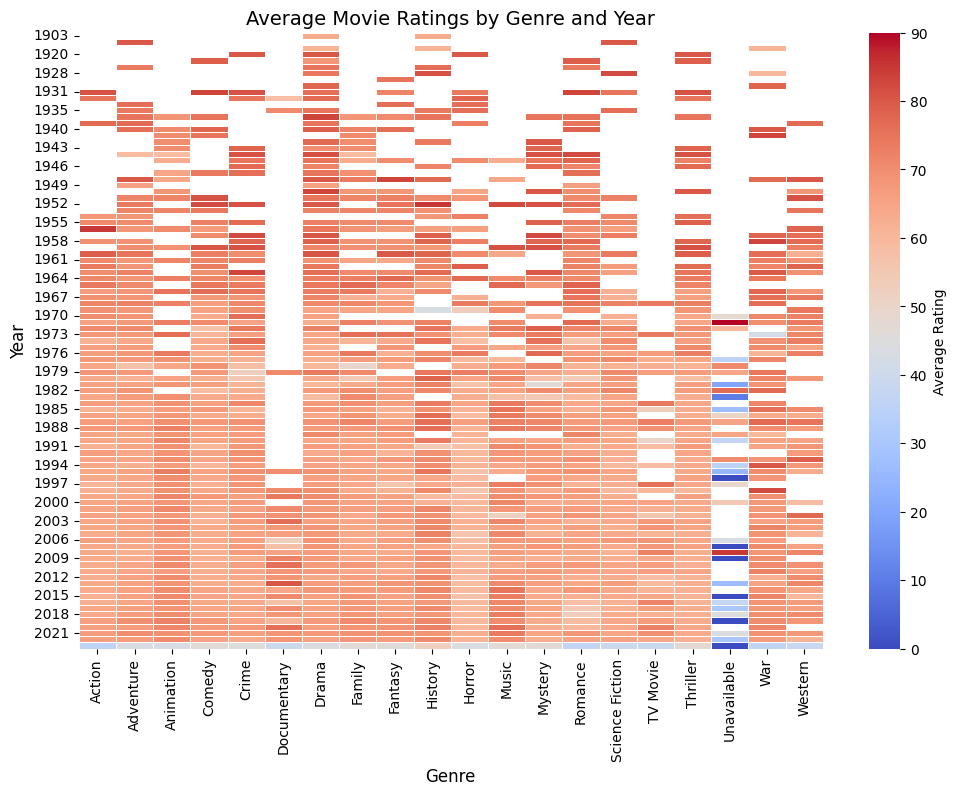

In [41]:
# Calculate average rating by genre and year
genre_year_avg_rating = df_expanded.groupby(['year', 'genre'])['score'].mean().reset_index()

# Pivot for heatmap visualization
pivot_table = genre_year_avg_rating.pivot(index='year', columns='genre', values='score')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Average Rating'})

plt.xlabel("Genre", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.title("Average Movie Ratings by Genre and Year", fontsize=14)
plt.show()


C:\Users\ajaym\AppData\Local\Temp\ipykernel_14876\3649702133.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_per_decade = genre_decade_counts.groupby('decade').apply(lambda x: x.nlargest(5, 'count', keep='all')).reset_index(drop=True)


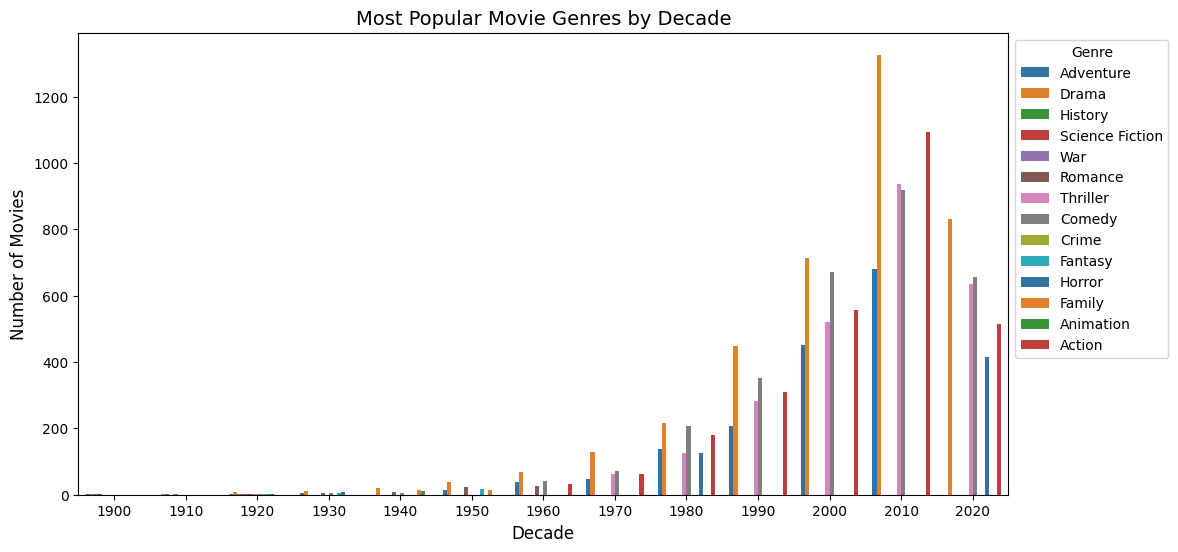

In [48]:
# Create the 'decade' column
df_expanded['decade'] = (df_expanded['year'] // 10) * 10

genre_decade_counts = df_expanded.groupby(['decade', 'genre']).size().reset_index(name='count')
top_genres_per_decade = genre_decade_counts.groupby('decade').apply(lambda x: x.nlargest(5, 'count', keep='all')).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_per_decade, x='decade', y='count', hue='genre', palette='tab10')
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Most Popular Movie Genres by Decade", fontsize=14)
plt.legend(title="Genre", bbox_to_anchor=(1, 1))
plt.show()


Summary of Movie Trends and Insights

    Impact of COVID-19 on Movie Releases:
    The number of movies released in 2020 was significantly lower, likely due to the disruptions caused by the COVID-19 pandemic.

    Popular Genres:
    Drama remains the most common genre, followed by Comedy and Horror. However, Science Fiction emerged as the most popular genre between 2010-2020.

    Movie Quality Trends:
    In the early years of cinema, fewer movies were produced, but they generally had higher ratings. Over time, as the number of releases increased,   ratings became more diversified.

    Highest Rated Genres:
    Historical genres tend to have higher average ratings. The top five highest-rated genres are:
        History: 69.16
        War: 69.07
        Animation: 68.99
        Music: 68.71
        Western: 68.00

    Surge in Movie Releases in 2022:
    The highest number of movie releases occurred in 2022, with 2,159 films, while the lowest number was recorded in 1929 with just one release.

    Declining Average Movie Ratings Over Time:
    While earlier movies had consistently higher ratings, the average rating has gradually declined, stabilizing in the 21st century.

    Budget and Revenue Correlation:
    There is a strong positive correlation (0.69) between a movie's budget and its revenue, indicating that higher investment often results in higher earnings.

    Genre Popularity Shifts Over Time:
    Between 2000-2010, Drama was the most popular genre. However, from 2010-2020, Science Fiction took the lead in popularity.

These insights highlight significant shifts in the film industry over time, from genre preferences to financial trends and the impact of global events on movie production.